In [1]:
import tensorflow as tf

from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

print('x_train.shape = ', x_train.shape, ' , x_test.shape = ', x_test.shape)
print('t_train.shape = ', t_train.shape, ' , t_test.shape = ', t_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train.shape =  (60000, 28, 28)  , x_test.shape =  (10000, 28, 28)
t_train.shape =  (60000,)  , t_test.shape =  (10000,)


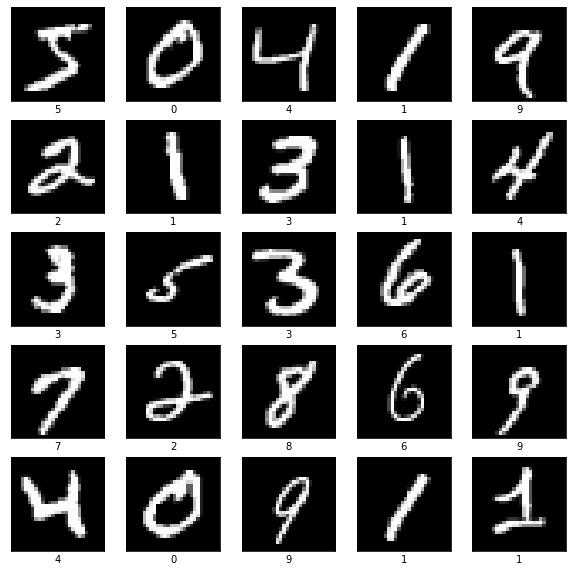

In [3]:
# 데이터 출력

plt.figure(figsize=(10,10))

for index in range(25):

    plt.subplot(5, 5, index+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[index], cmap='gray')
    plt.xlabel(str(t_train[index]))

plt.show()

In [12]:
# sequential model construction

model = Sequential()

model.add(Conv2D(input_shape=(28,28,1), kernel_size=3, filters=32, strides=(1,1), activation='relu', padding='SAME'))
model.add(MaxPooling2D(pool_size=(2,2), padding='SAME'))
model.add(Dropout(0.5))

model.add(Conv2D(kernel_size=3, filters=64, strides=(1,1), activation='relu', padding='SAME'))
model.add(MaxPooling2D(pool_size=(2,2), padding='SAME'))
model.add(Dropout(0.5))

model.add(Conv2D(kernel_size=3, filters=128, strides=(1,1), activation='relu', padding='SAME'))
model.add(MaxPooling2D(pool_size=(2,2), padding='SAME'))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(10, activation='softmax'))

In [13]:
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 128)        

In [15]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [16]:
start_time = datetime.now()

hist = model.fit(x_train, t_train, batch_size=50, epochs=50, validation_data=(x_test, t_test))

end_time = datetime.now()

print('\n\nElapsed Time => ', end_time - start_time)

Epoch 1/50
1200/1200 [==============================] - 4s 3ms/step - loss: 0.3239 - accuracy: 0.8931 - val_loss: 0.0609 - val_accuracy: 0.9811
Epoch 2/50
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1163 - accuracy: 0.9629 - val_loss: 0.0438 - val_accuracy: 0.9867
Epoch 3/50
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0932 - accuracy: 0.9703 - val_loss: 0.0357 - val_accuracy: 0.9881
Epoch 4/50
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0810 - accuracy: 0.9742 - val_loss: 0.0277 - val_accuracy: 0.9909
Epoch 5/50
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0744 - accuracy: 0.9760 - val_loss: 0.0278 - val_accuracy: 0.9910
Epoch 6/50
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0687 - accuracy: 0.9789 - val_loss: 0.0265 - val_accuracy: 0.9917
Epoch 7/50
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0651 - accuracy: 0.9800 - val_loss: 0.0249 - val_accuracy:

In [17]:
# x_test 도 마찬가지로 데이터를 4차원으로 reshape 으로 변환 해주지 않으면 error

model.evaluate(x_test, t_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0191 - accuracy: 0.9942


[0.019122177734971046, 0.9941999912261963]

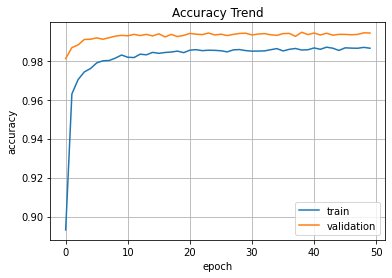

In [18]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()

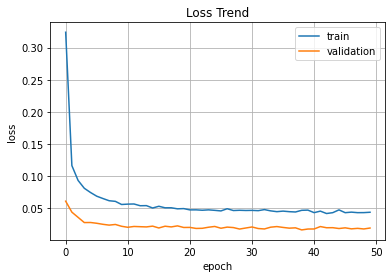

In [19]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()